<a href="https://colab.research.google.com/github/carlmaps/Visualizaion-Projects/blob/master/NewYork_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Exploratory Data Analysis - New York Airbnb
Datasource: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

This is just an exercise to get used to the process of exploratory data analysis to be able to get insights on the data. 

We try to seek answer to the following questions:
*   Which hosts are the busiest and why?
*   What areas have more traffic than others and why is that the case?
*   Are there any relationships between prices, number of reviews, 
    and the number of days that a given listing is booked?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)

pio.renderers.default='colab'


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install kaggle
# Import kaggle.json from google drive
# This snippet will output a link which needs authentication from any google account
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

! mkdir ~/.kaggle
! cp /content/.kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

!mkdir airBNB
!unzip new-york-city-airbnb-open-data.zip -d airBNB

Download 100%.
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.9MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: airBNB/AB_NYC_2019.csv  
  inflating: airBNB/New_York_City_.png  


In [3]:
df = pd.read_csv('/content/airBNB/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


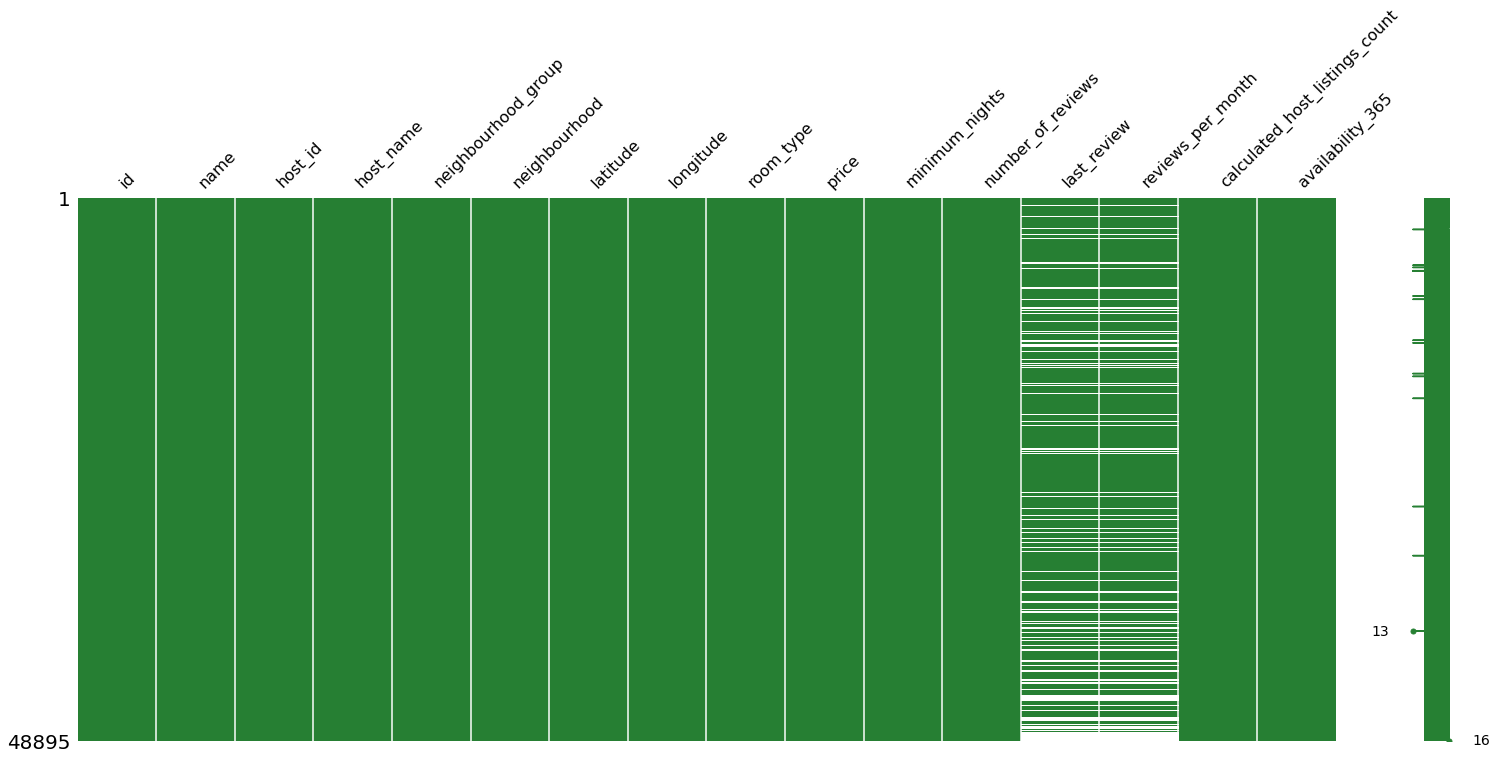

In [7]:
import missingno as mns
mns.matrix(df,color=(0.15, 0.5, 0.2))

In [0]:
df.drop(['id', 'name', 'last_review'], axis = 1, inplace=True)

In [0]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

##### Exploratory Data Analysis
**Host_ID**

In [9]:
top10_host = df.host_id.value_counts().head(10)
top10_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Text(0.5, 1.0, 'Top 10 Host ID')

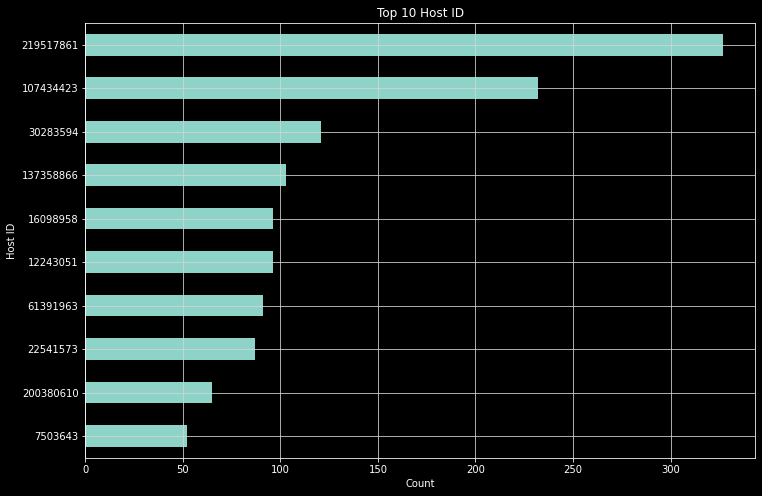

In [10]:
plt.style.use('dark_background')
plot = top10_host.sort_values(ascending=True).plot(figsize=(12,8), kind='barh')

plot.grid(color='#d4d4d4')
plot.set_ylabel('Host ID')
plot.set_xlabel('Count')
plot.set_title('Top 10 Host ID')

In [11]:
fig = px.histogram(data_frame=df, x='price', template='plotly_dark')

fig.show()

In [12]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Price Distribution In Neighbourhood Group

In [0]:
brooklyn = df.loc[df['neighbourhood_group'] == 'Brooklyn']
manhattan = df.loc[df['neighbourhood_group'] == 'Manhattan']
queens = df.loc[df['neighbourhood_group'] == 'Queens']
statenIsland = df.loc[df['neighbourhood_group'] == 'Staten Island']
bronx = df.loc[df['neighbourhood_group'] == 'Bronx']

(0.0, 2000.0)

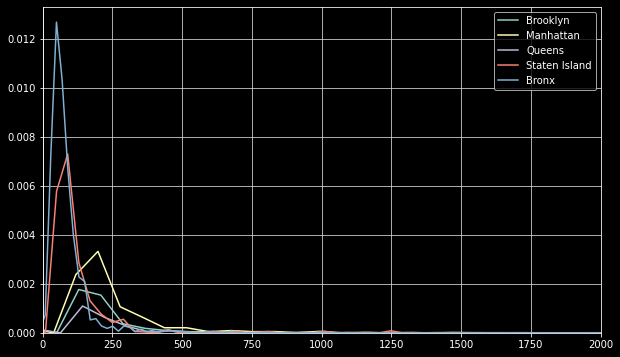

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(brooklyn[['price']], hist=False, label='Brooklyn')
sns.distplot(manhattan[['price']], hist=False, label='Manhattan')
sns.distplot(queens[['price']], hist=False, label='Queens')
sns.distplot(statenIsland[['price']], hist=False, label='Staten Island')
sns.distplot(bronx[['price']], hist=False, label='Bronx')

plt.grid(color='#d4d4d4')
plt.xlim(0,2000)

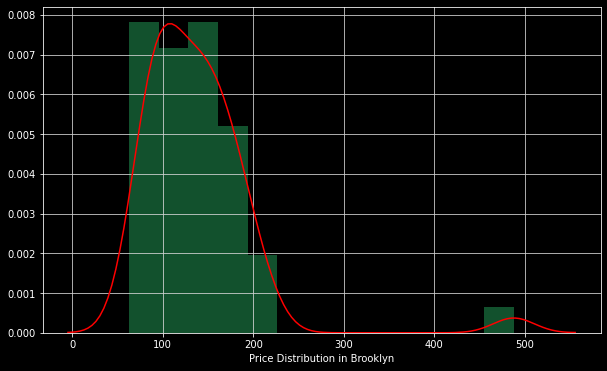

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.distplot(brooklyn[['neighbourhood', 'price']].groupby('neighbourhood').mean(), kde_kws={"color": "r"}, hist_kws = {"color": "#2ecc71"} ,axlabel='Price Distribution in Brooklyn')

plt.grid(color='#d4d4d4')

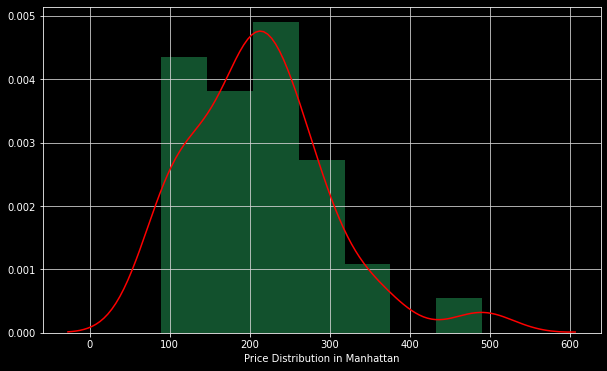

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.distplot(manhattan[['neighbourhood', 'price']].groupby('neighbourhood').mean(), kde_kws={"color": "r"}, hist_kws = {"color": "#2ecc71"}, axlabel='Price Distribution in Manhattan')

plt.grid(color='#d4d4d4')

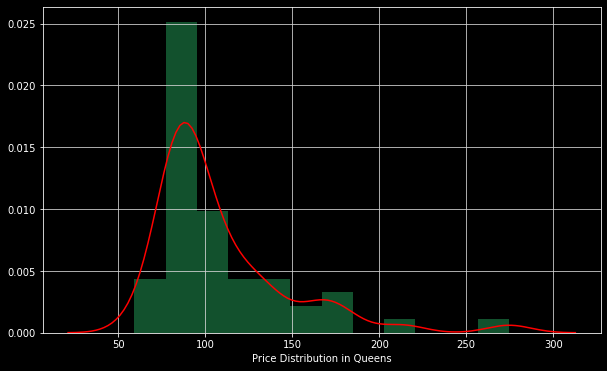

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.distplot(queens[['neighbourhood', 'price']].groupby('neighbourhood').mean(), kde_kws={"color": "r"}, hist_kws = {"color": "#2ecc71"}, axlabel='Price Distribution in Queens')

plt.grid(color='#d4d4d4')

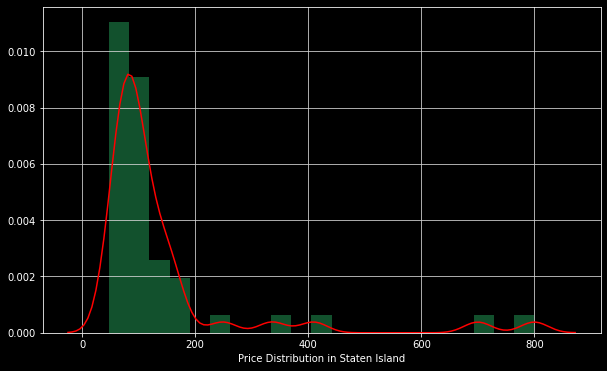

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.distplot(statenIsland[['neighbourhood', 'price']].groupby('neighbourhood').mean(), kde_kws={"color": "r"}, hist_kws = {"color": "#2ecc71"}, axlabel='Price Distribution in Staten Island')

plt.grid(color='#d4d4d4')

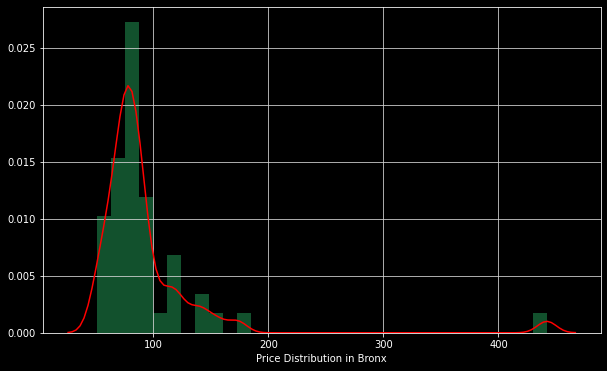

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.distplot(bronx[['neighbourhood', 'price']].groupby('neighbourhood').mean(), kde_kws={"color": "r"}, hist_kws = {"color": "#2ecc71"}, axlabel='Price Distribution in Bronx',)

plt.grid(color='#d4d4d4')

Price Distribution Per Room Type

In [20]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

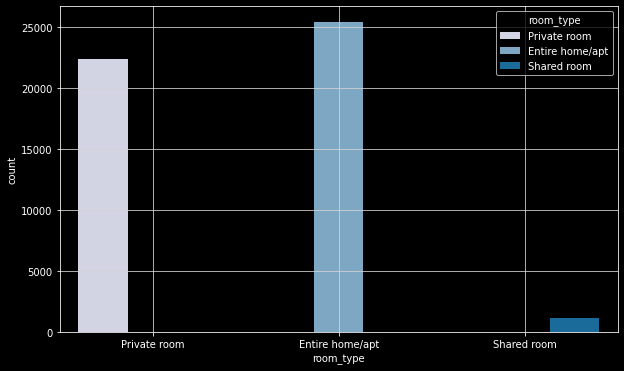

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

sns.countplot(x='room_type', data=df, hue='room_type', palette="PuBu")
plt.grid(color='#d4d4d4')

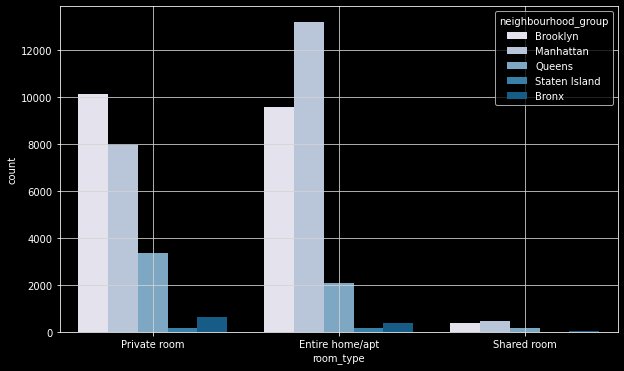

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

sns.countplot(x='room_type', data=df, hue='neighbourhood_group', palette="PuBu")
plt.grid(color='#d4d4d4')

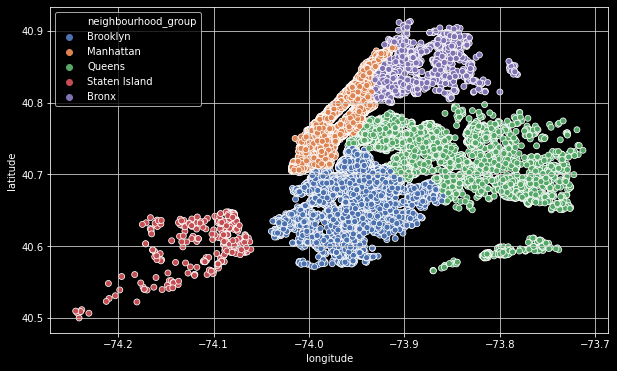

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

plt.grid(color='#d4d4d4')
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group',palette="deep")


In [0]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [0]:
df_nyAirbnb = pd.read_csv('/content/airBNB/AB_NYC_2019.csv')

In [53]:
df_nyAirbnb.dtypes

id                                  int64
roomNm                             object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [0]:
df_nyAirbnb.rename(columns={'roomNm':'room'}, inplace=True)

In [0]:
map = folium.Map(location=[40.80,-73.80], zoom_start = 10,)

nyAirbnbRooms = plugins.MarkerCluster().add_to(map)

#for lat, lon, label in zip(df_nyAirbnb.latitude, df_nyAirbnb.longitude, df_nyAirbnb.name):
  #folium.Marker(location=[lat, lon], icon=folium.Icon(icon='home'), popup=label).add_to(nyAirbnbRooms)


for lat,lon,label in zip(df_nyAirbnb.latitude,df_nyAirbnb.longitude,df_nyAirbnb['neighbourhood']):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label,).add_to(nyAirbnbRooms)
map.add_child(nyAirbnbRooms)
#map.add_child(nyAirbnbRooms)
map.save('samp.html')